In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import datetime
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.colors import from_levels_and_colors
from matplotlib.colors import TwoSlopeNorm
from cartopy.util import add_cyclic_point
import cartopy as cart

In [2]:
# Composite largest eruptions based on aod
# lse = large single eruptions
# ldb = large double eruptions
# std = standard deviation

lse_tas_a_avg = xr.open_dataset('lse_tas_a_avg.nc')
ldb_tas_a_avg = xr.open_dataset('ldb_tas_a_avg.nc')

lse_std_novolc = xr.open_dataset('lse_std_novolc.nc')
ldb_std_novolc = xr.open_dataset('ldb_std_novolc.nc')

In [4]:
lse_2sig = abs(lse_tas_a_avg['tas_avg']) - abs(lse_std_novolc['std']*2)
ldb_2sig = abs(ldb_tas_a_avg['tas_avg']) - abs(ldb_std_novolc['std']*2)

In [5]:
sig0_ldb = np.where(ldb_2sig[:,:]>0.0,1,-1)
sig0_lse = np.where(lse_2sig[:,:]>0.0,1,-1)

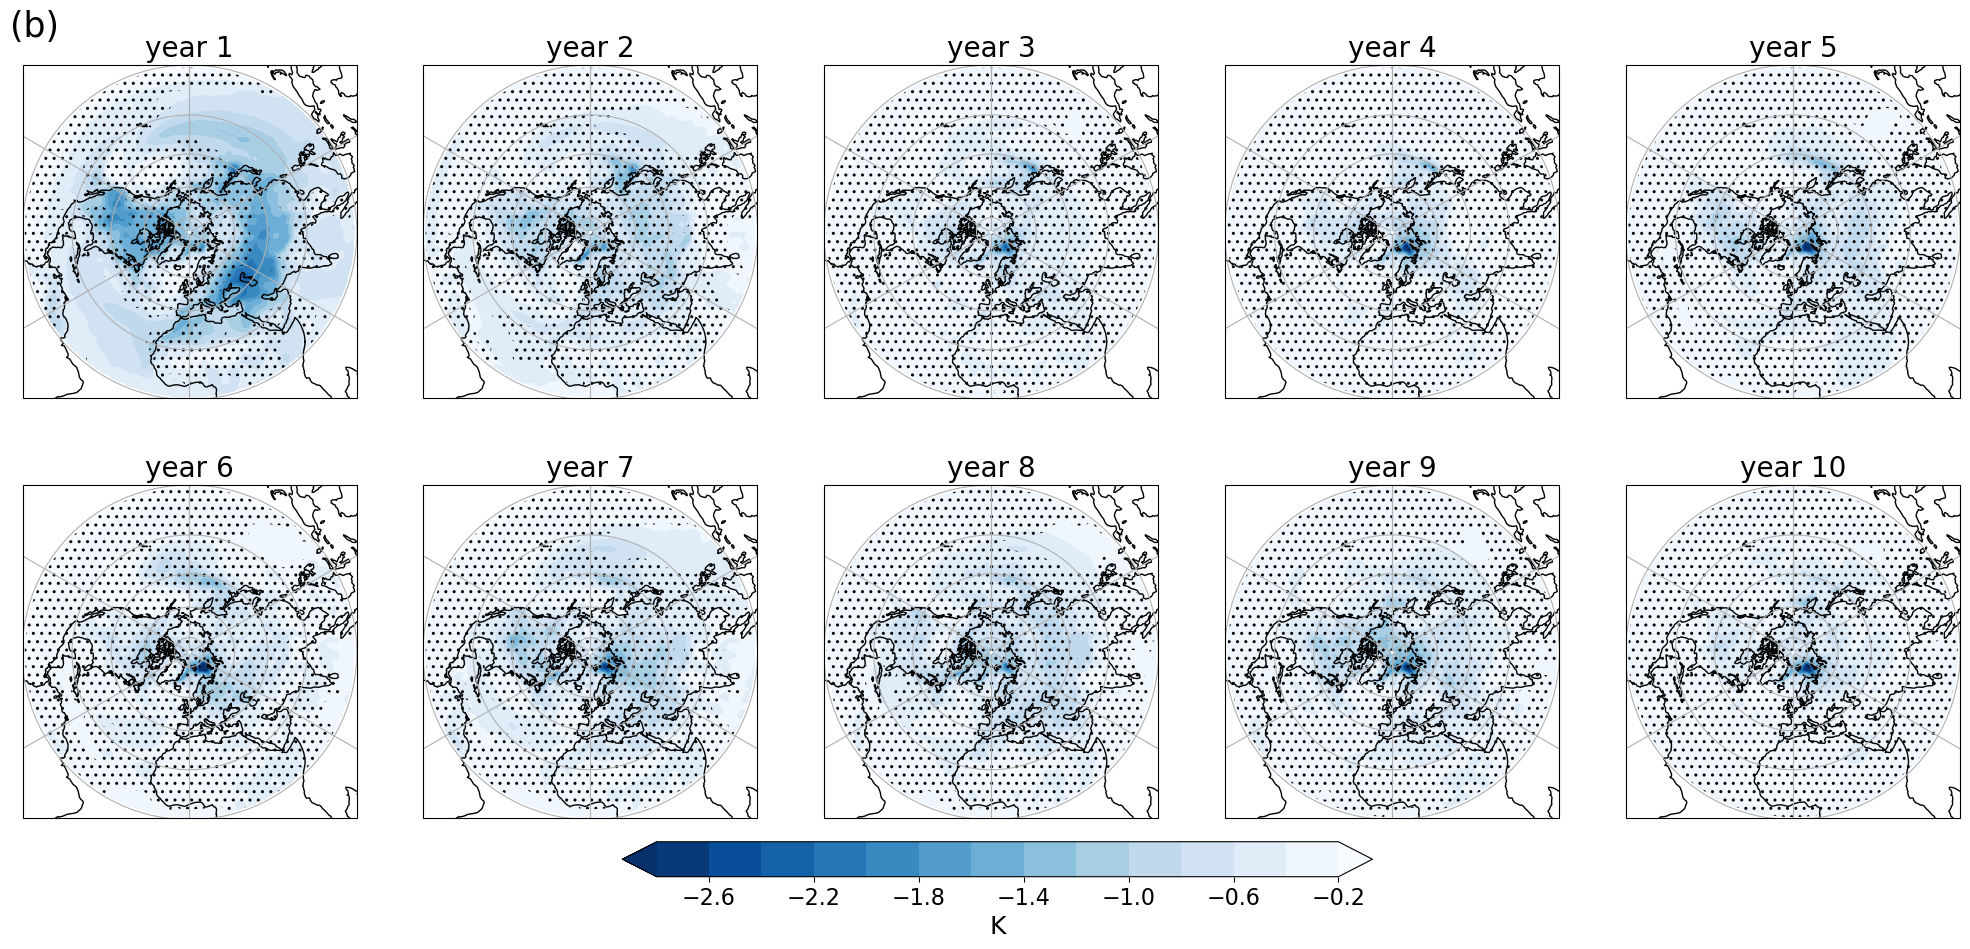

In [11]:
# Plot large double eruption response

fig = plt.figure(figsize=[25,10])

#####
vc=np.arange(-2.8,0,0.2)
data_crs = ccrs.PlateCarree()
dataset = ldb_tas_a_avg['tas_avg']
#sig = ldb_2sig

title = ['year 1','year 2','year 3','year 4','year 5','year 6','year 7','year 8','year 9','year 10']

#### Extent ####
coord_east=-180
coord_west=180
coord_south=0
coord_north=90
plt_area='NH'

for i in range(10):
    
    lines = []
    ax = plt.subplot(2,5,i+1, projection=ccrs.NorthPolarStereo())
    ax.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
    ax.gridlines()
    ax.coastlines()
    #ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='#5c5c8a', facecolor='#c2c2d6')
    #ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', 
                                               # facecolor=cfeature.COLORS['land']))
    ax.set_title(title[i],fontsize=20)
    
    data, lon = add_cyclic_point(dataset[i,:,:],dataset['lon'])

    
    map=ax.contourf(lon[:], dataset["lat"][:], data[:,:], vc,
                transform = data_crs, extend='both', cmap=plt.get_cmap('Blues_r'))
    
    data2, lon2 = add_cyclic_point(sig0_ldb[:,:], ldb_tas_a_avg['tas_avg']['lon'])
    
    stipples=ax.contourf(lon2, ldb_tas_a_avg['tas_avg']['lat'][:], data2[i,:,:], colors='none', 
                             levels=[-1,0], transform = data_crs, hatches=['..']) 

   
cbar_ax = fig.add_axes([0.365, 0.06, 0.3, 0.035])
fig.colorbar(map, cax=cbar_ax, extend='both', orientation='horizontal', fraction=0.043, pad=0.04)
cbar_ax.tick_params(labelsize=16)
cbar_ax.set_xlabel('K', fontsize=18)

plt.text(0.12,0.9,'(b)', fontsize=25, transform=plt.gcf().transFigure)
#plt.title('Double eruptions', fontsize=30)


#plt.savefig('figures/ldb_tas_a_10y_2sig_notstip_b_spline.png', bbox_inches='tight')

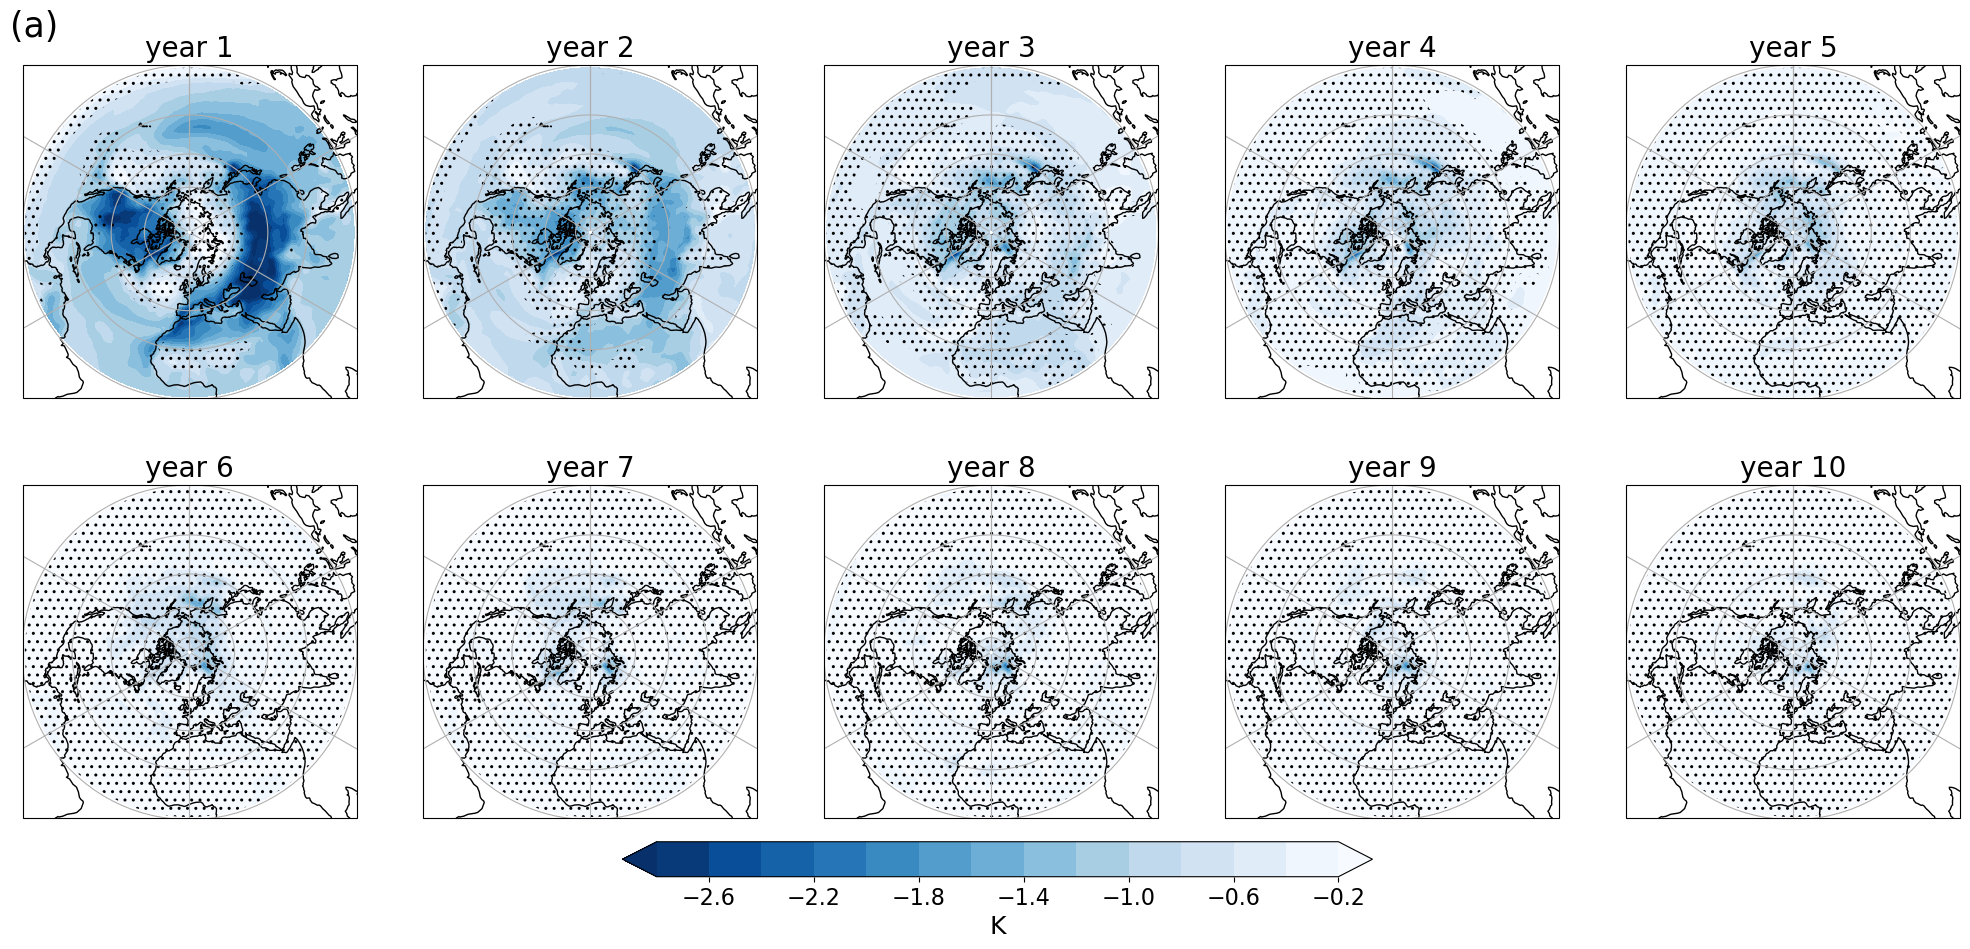

In [12]:
# Plot large single eruption response

fig = plt.figure(figsize=[25,10])

#####
vc=np.arange(-2.8,0,0.2)
data_crs = ccrs.PlateCarree()
dataset = lse_tas_a_avg['tas_avg']
sig = lse_2sig

title = ['year 1','year 2','year 3','year 4','year 5','year 6','year 7','year 8','year 9','year 10']

#### Extent ####
coord_east=-180
coord_west=180
coord_south=0
coord_north=90
plt_area='NH'

for i in range(10):
    
    lines = []
    ax = plt.subplot(2,5,i+1, projection=ccrs.NorthPolarStereo())
    ax.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
    ax.gridlines()
    ax.coastlines()
    #ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='#5c5c8a', facecolor='#c2c2d6')
    #ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', 
                                               # facecolor=cfeature.COLORS['land']))
    ax.set_title(title[i],fontsize=20)
    
    data, lon = add_cyclic_point(dataset[i,:,:],dataset['lon'])

    
    map=ax.contourf(lon[:], dataset["lat"][:], data[:,:], vc,
                transform = data_crs, extend='both', cmap=plt.get_cmap('Blues_r'))
    
    data2, lon2 = add_cyclic_point(sig0_lse[:,:], lse_tas_a_avg['tas_avg']['lon'])
    
    stipples=ax.contourf(lon2, lse_tas_a_avg['tas_avg']['lat'][:], data2[i,:,:], colors='none', 
                             levels=[-1,0], transform = data_crs, hatches=['..']) 

    
cbar_ax = fig.add_axes([0.365, 0.06, 0.3, 0.035])
fig.colorbar(map, cax=cbar_ax, extend='both', orientation='horizontal', fraction=0.043, pad=0.04)
cbar_ax.tick_params(labelsize=16)
cbar_ax.set_xlabel('K', fontsize=18)

plt.text(0.12,0.9,'(a)', fontsize=25, transform=plt.gcf().transFigure)
#plt.title('Single eruptions', fontsize=30)

#plt.savefig('figures/lse_tas_a_10y_2sig_notstip_a_spline.png', bbox_inches='tight')